In [3]:
!git config --global user.name "LanceM28" 
!git config --global git config --global user.email "lmoreau@terpmail.umd.edu"

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    --worktree            use per-worktree config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-pattern]
    --get-all             get all values: key [value-pattern]
    --get-regexp          get values for regexp: name-regex [value-pattern]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value-pattern]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-pattern]
    --unset-all           remove all matches: name [value-pattern]
    --rename-section      rename section: old-name new-name
    --remove-secti

In [ ]:
#initialization

import numpy as np
import matplotlib.pyplot as plt
import yt
import os
from yt.funcs import mylog
mylog.setLevel(40) #has to do something with what errors get stored?

cell_fields = [
    "Density",
    "x-velocity",
    "y-velocity",
    "z-velocity",
    "Pressure",
    "Metallicity",
    # "dark_matter_density",
    "xHI",
    "xHII",
    "xHeII",
    "xHeIII",
]
'''Defining the field names given in the simulaiton to be loaded
Is this dynamic? is this more like a call or more like a label
'''
epf = [
    ("particle_family", "b"),
    ("particle_tag", "b"),
    ("particle_birth_epoch", "d"),
    ("particle_metallicity", "d"),
]
'''
Set up additional value slots for particles, 
allowing us to then hold the spectroscopic values we want in particles.
'''

In [ ]:
#this was from the old code used to load the data

f1 = "/Users/lamoreau/python/Aether Spectroscopy/output_00273/info_00273.txt" 
#this is the name of the input file
#f2 = "/Users/lamoreau/python/Aether Spectroscopy/output_00274/info_00274.txt"
#this is the name of the output file? I think it is actually an input file that I just don't have
pre_sfc_ds = yt.load(f1, fields=cell_fields, extra_particle_fields=epf) 
#pre_sfc_ds.print_stats()#this details the attributes of the different fields
#print(pre_sfc_ds.domain_width.in_units("Mpc"))


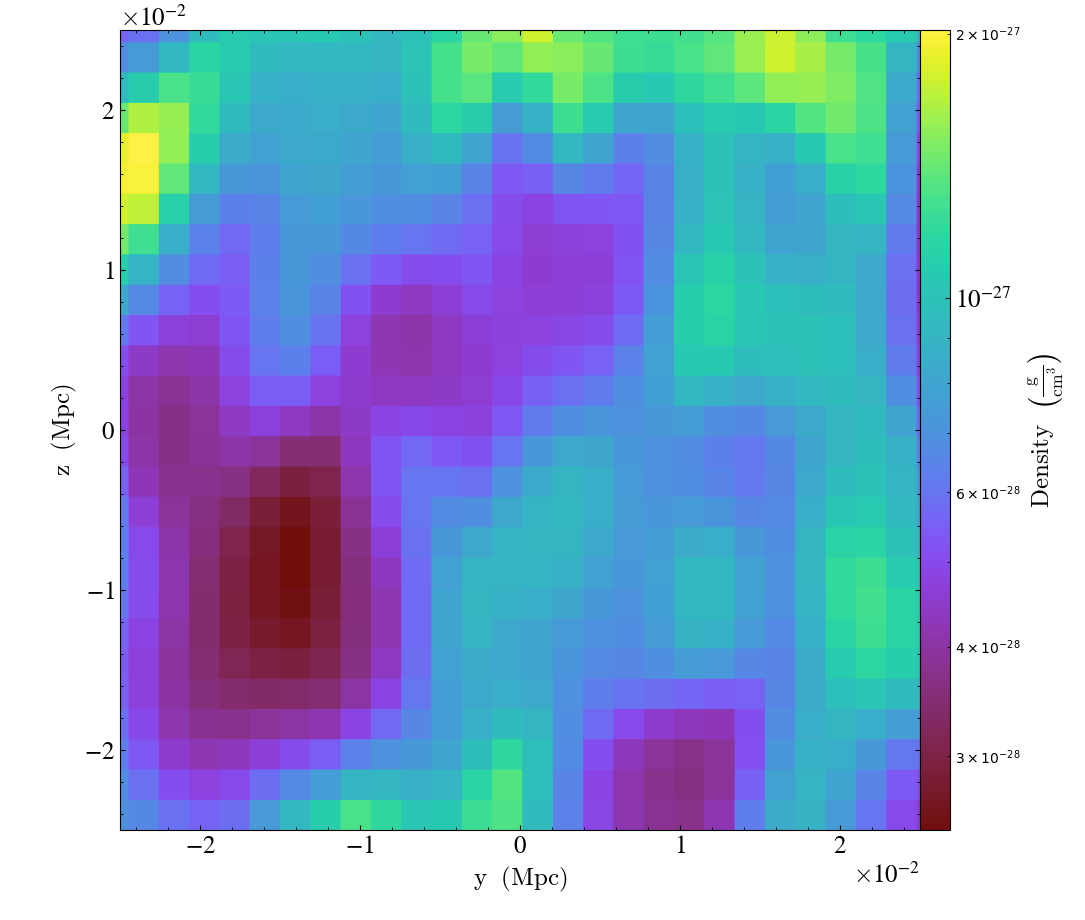


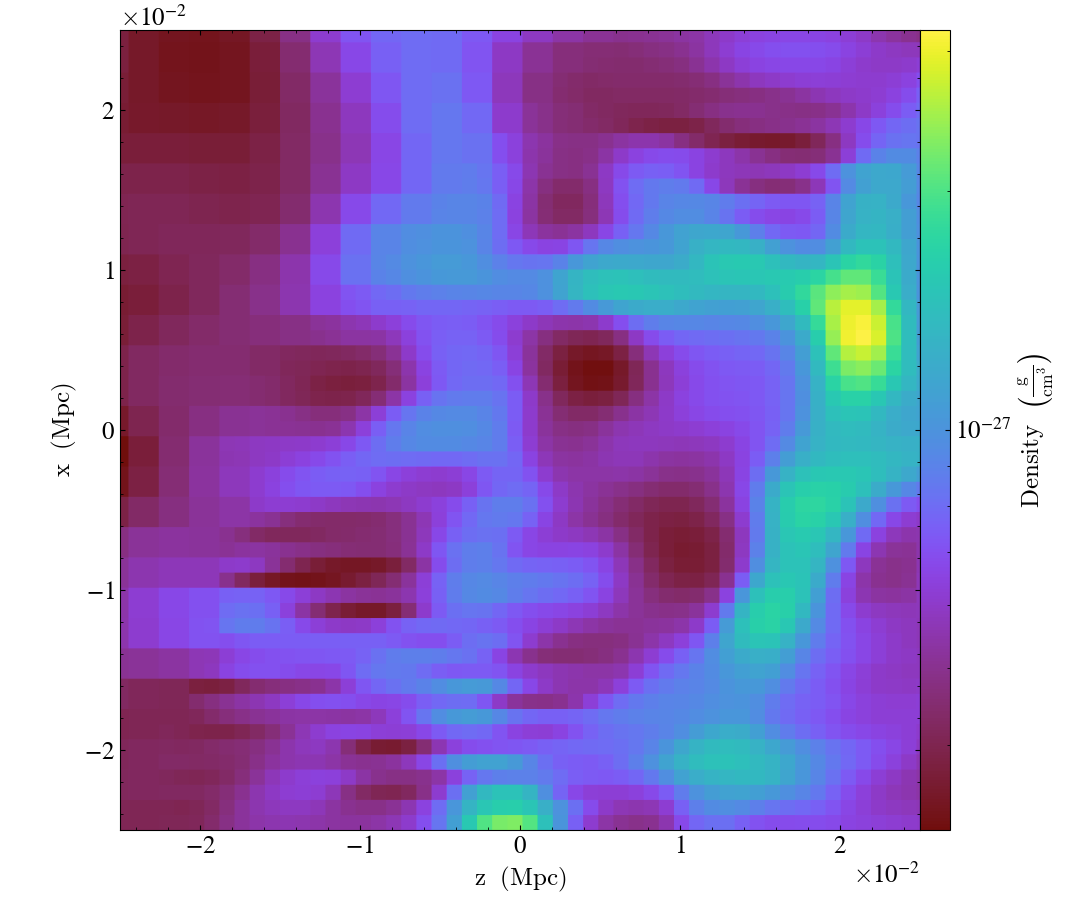


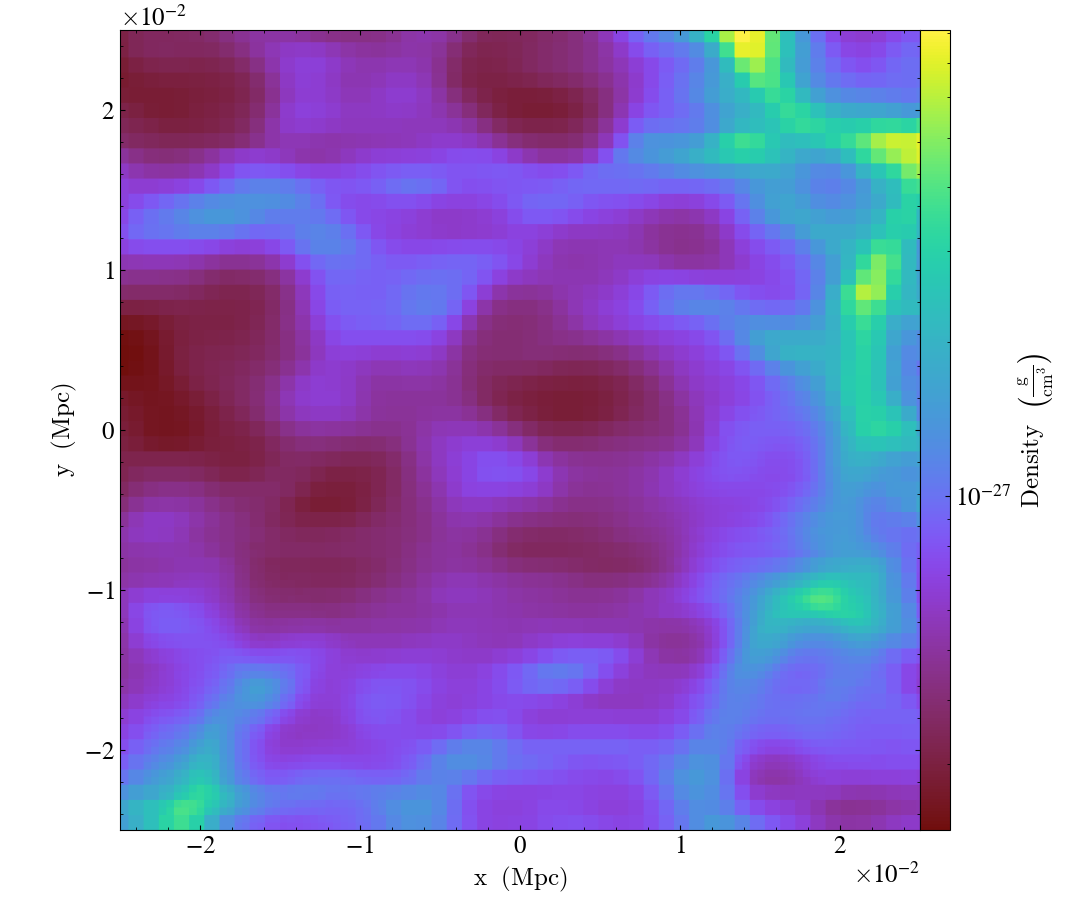

In [ ]:
#Creating Slice Plots
# Creating Slice Plots and saving to specific format
"""for axis in ['x', 'y', 'z']:
    width1 = (0.05, "Mpc")
    plot = yt.SlicePlot(pre_sfc_ds, axis, ("gas", "density"), width=width1)
    #method calling width from measured width seems fairly innefficient, there has to be a better way
    #plot.save(f"/Users/lamoreau/python/Aether Spectroscopy/Plots/density_slice_{axis}_{width1[0]}.png")  # Specify format explicitly
    v, c = pre_sfc_ds.find_max(("gas", "density"))
    plot.set_center((c[0], c[1]))
    plot.show()"""


In [ ]:
v, c = pre_sfc_ds.find_max(("ramses", "Metallicity"))
"""for axis in ['x', 'y', 'z']:
    width2 = (0.05, "Mpc")
    plot2 = yt.ProjectionPlot(pre_sfc_ds, axis, ("ramses", "Metallicity"), width = width2) #does not interface well with the sphere,
    #plot2.save(f"/Users/lamoreau/python/Aether Spectroscopy/Plots/metallicity_projection_{axis}_{width2[0]}.png")
    plot2.set_center((c[0], c[1]))
    plot2.show()

v, c = pre_sfc_ds.find_max(("gas", "density"))
for axis in ['x', 'y', 'z']:
    width3 = (0.08, "Mpc")
    plot3 = yt.ProjectionPlot(pre_sfc_ds, axis, [("gas", "density"), ("gas", "temperature")], weight_field=("gas", "density"), width = width3)
    #the projection plot function can take an array
    #gas is the particle 
    #plot.save(f"/Users/lamoreau/python/Aether Spectroscopy/Plots/density_projection_{axis}_{width3[0]}.png")  # Specify format explicitly
    plot3.set_center((c[1], c[2]))
    plot3.show()"""

'for axis in [\'x\', \'y\', \'z\']:\n    width2 = (0.05, "Mpc")\n    plot2 = yt.ProjectionPlot(pre_sfc_ds, axis, ("ramses", "Metallicity"), width = width2) #does not interface well with the sphere,\n    #plot2.save(f"/Users/lamoreau/python/Aether Spectroscopy/Plots/metallicity_projection_{axis}_{width2[0]}.png")\n    plot2.set_center((c[0], c[1]))\n    plot2.show()\n\nv, c = pre_sfc_ds.find_max(("gas", "density"))\nfor axis in [\'x\', \'y\', \'z\']:\n    width3 = (0.08, "Mpc")\n    plot3 = yt.ProjectionPlot(pre_sfc_ds, axis, [("gas", "density"), ("gas", "temperature")], weight_field=("gas", "density"), width = width3)\n    #the projection plot function can take an array\n    #gas is the particle \n    #plot.save(f"/Users/lamoreau/python/Aether Spectroscopy/Plots/density_projection_{axis}_{width3[0]}.png")  # Specify format explicitly\n    plot3.set_center((c[1], c[2]))\n    plot3.show()'


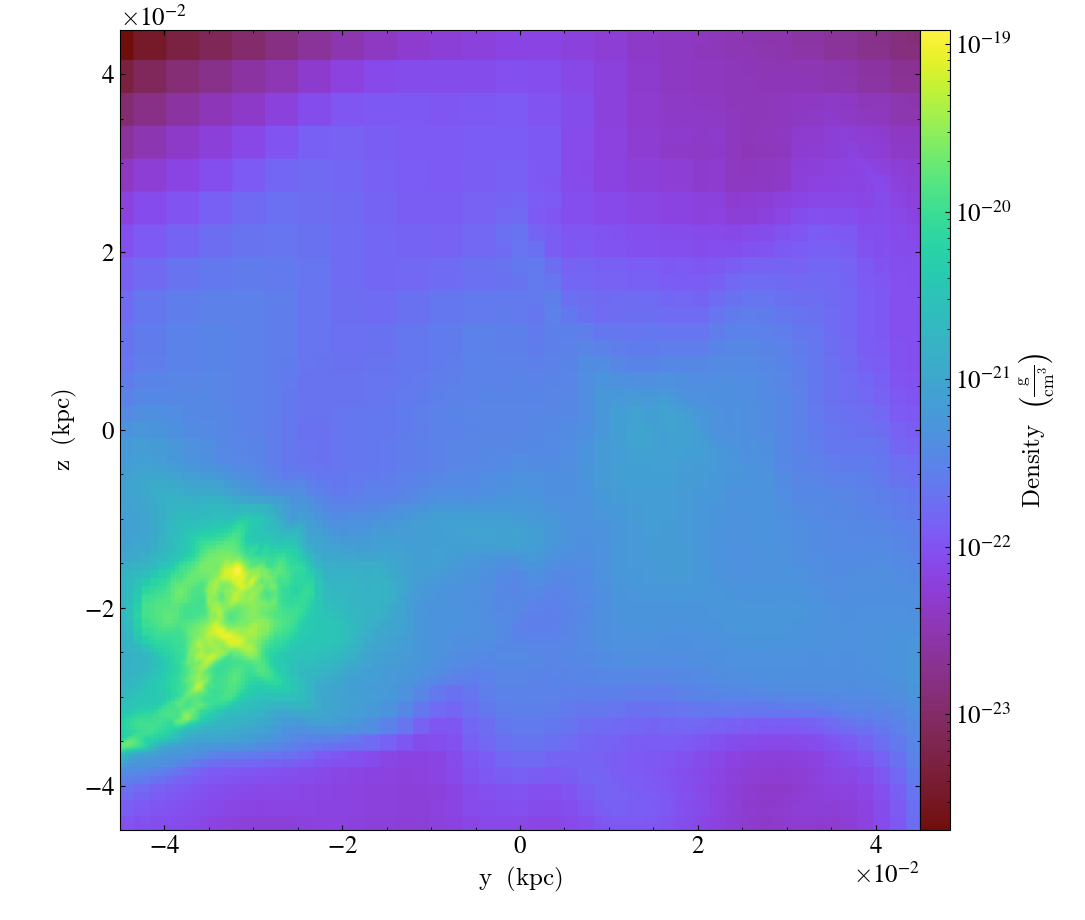
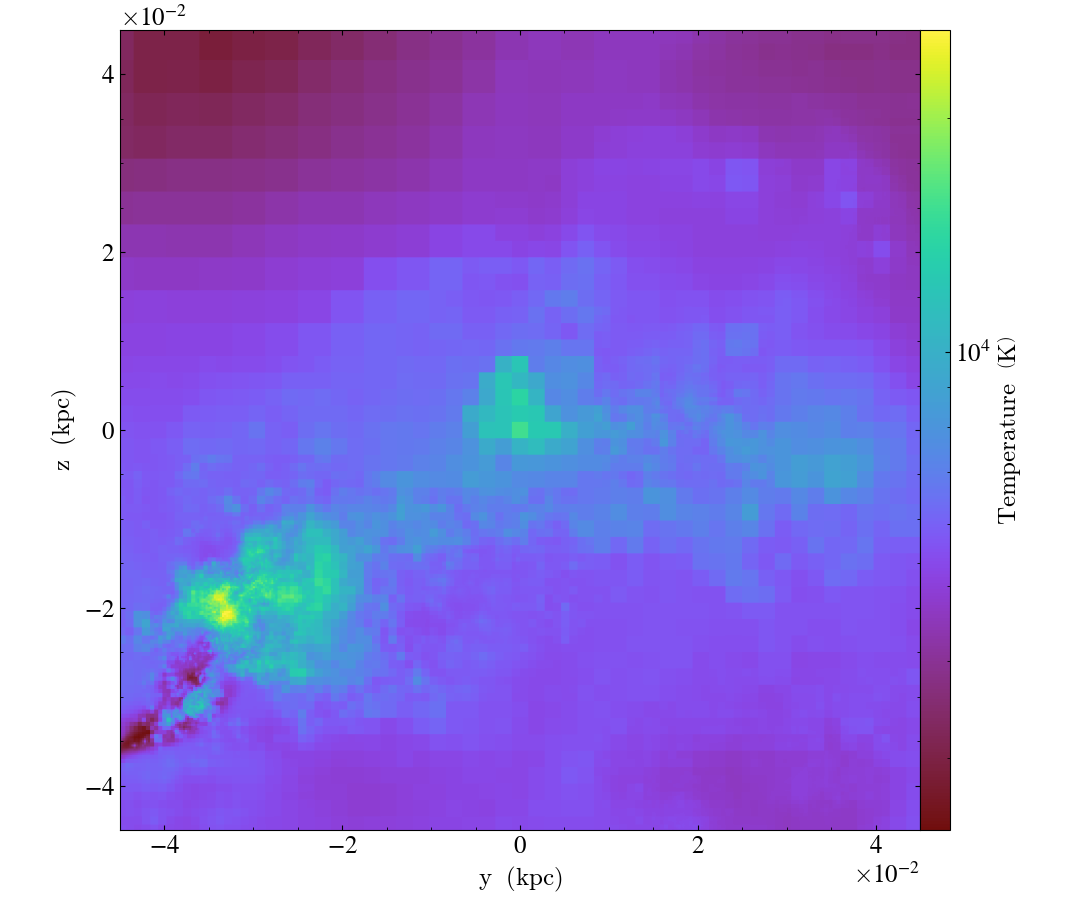


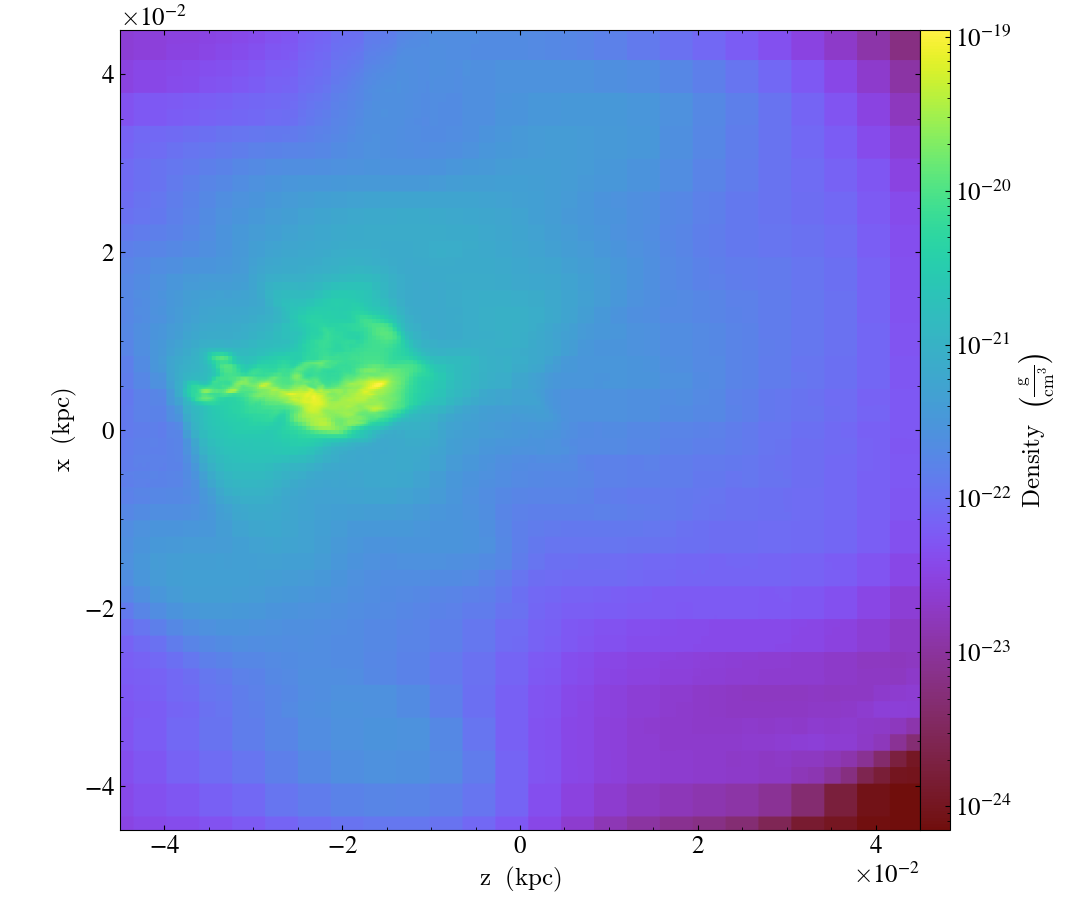
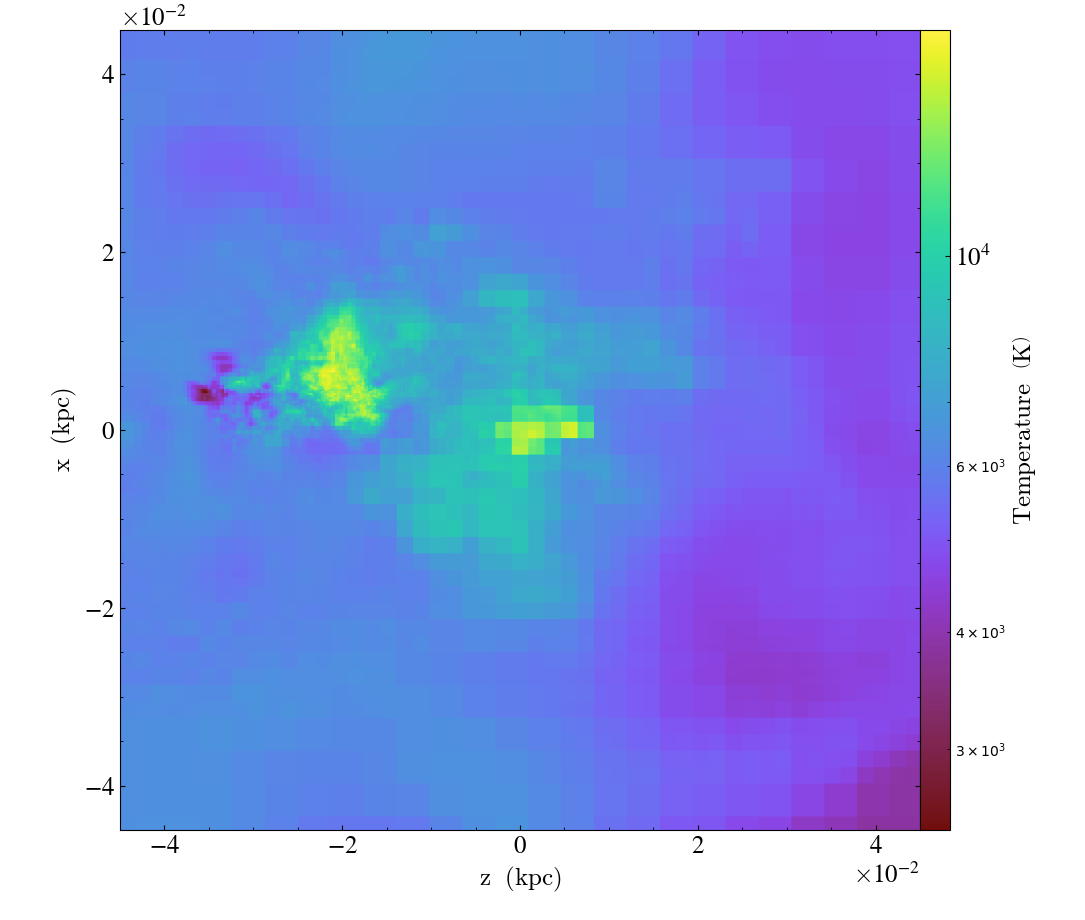


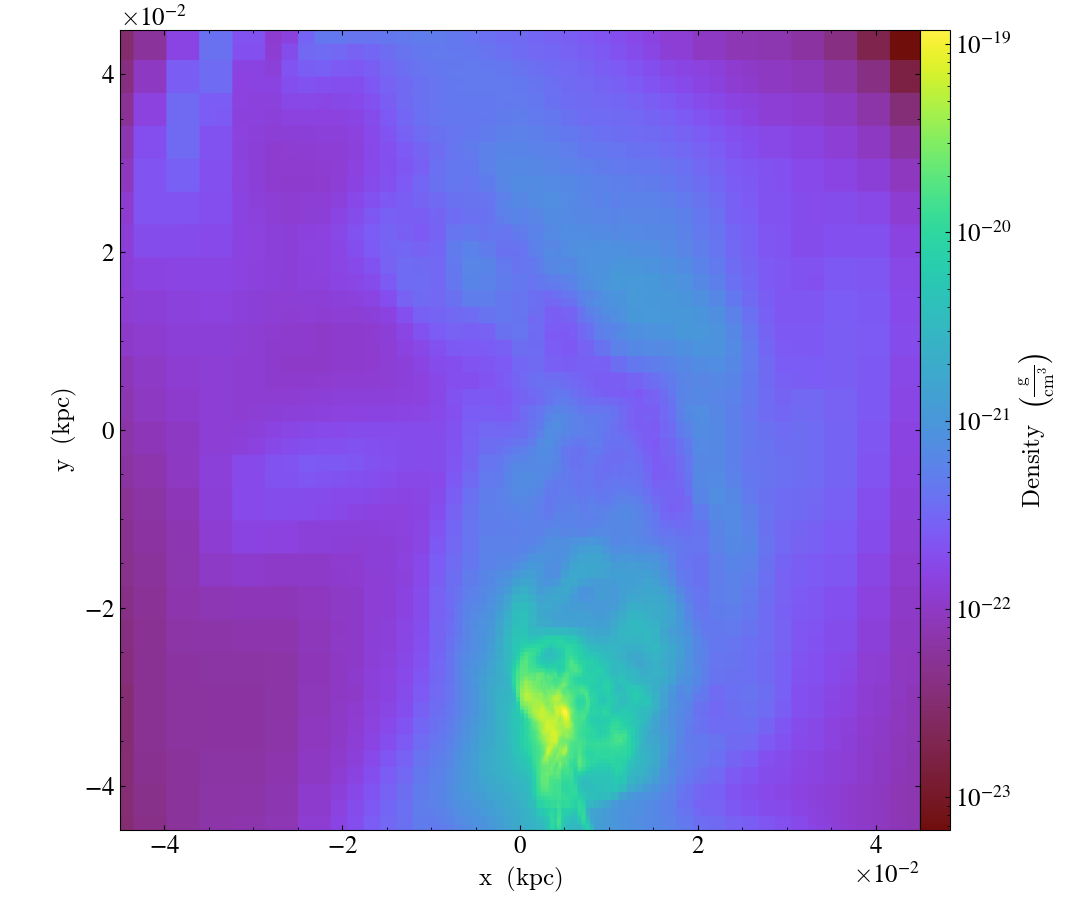
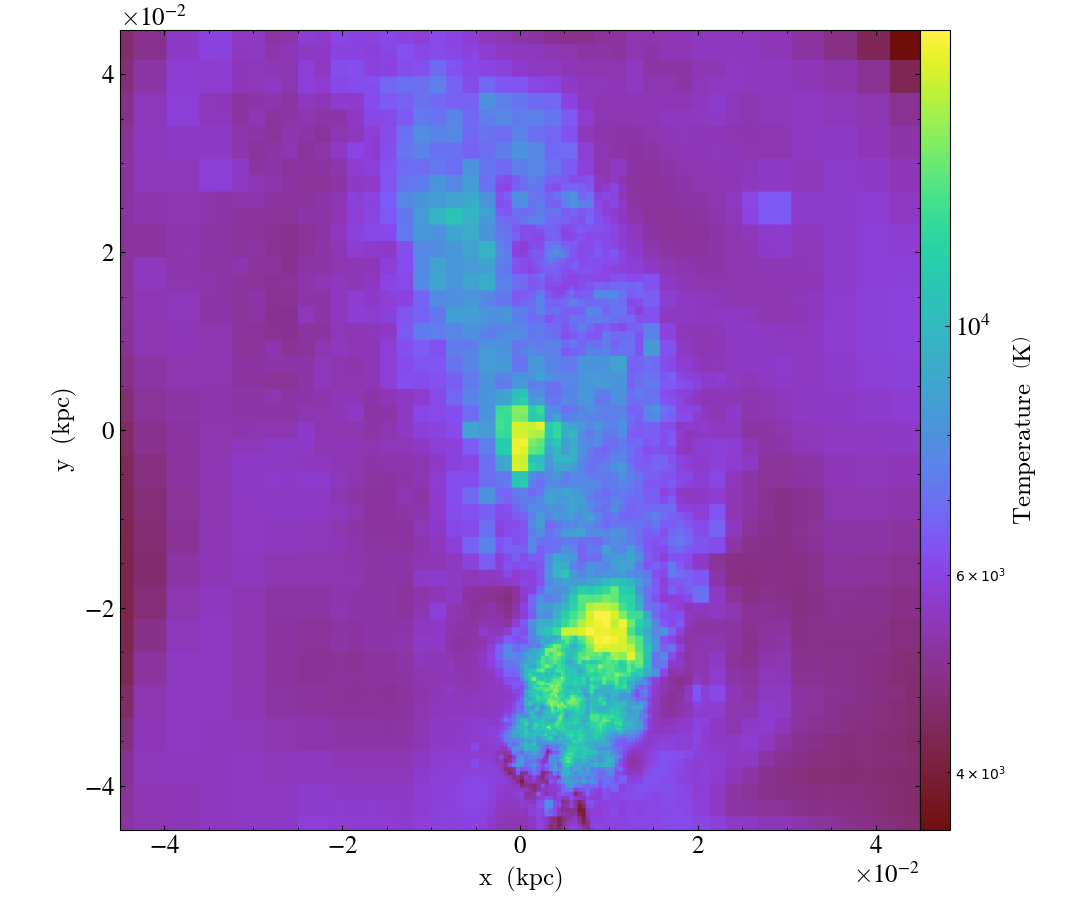

In [ ]:
'''v, c = pre_sfc_ds.find_max(("gas", "density"))
for axis in ['x', 'y', 'z']:
    width3 = (0.1, "Mpc")
    plot3 = yt.ProjectionPlot(pre_sfc_ds, axis, [("gas", "density"), ("gas", "temperature")], weight_field=("gas", "density"), width = width3)
    #the projection plot function can take an array
    #gas is the particle 
    #plot.save(f"/Users/lamoreau/python/Aether Spectroscopy/Plots/density_projection_{axis}_{width3[0]}.png")  # Specify format explicitly
    plot3.set_center((c[0], c[1]))
    plot3.show()'''

# Make a projection that is the full width of the domain,
# but only _____ Mpc in depth.  This is done by creating a
# region object with this exact geometry and providing it
# as a data_source for the projection.

# Center on the domain center
v, c = pre_sfc_ds.find_max(("gas", "temperature")) #find COM of stars for best center
#print(c.in_units("Mpc"))
# First make the left and right corner of the region based
# on the full domain.

left_corner = pre_sfc_ds.domain_left_edge.copy()
right_corner = pre_sfc_ds.domain_right_edge.copy()


# Now adjust the size of the region along the line of sight (x axis).
depth = pre_sfc_ds.quan(5, "Mpc") # I want to find the maximum in this depth range
left_corner[0] = c[0] - 1 * depth
right_corner[0] = c[0] + 1 * depth
left_corner[1]= c[1] - 1 * depth
right_corner[1] = c[1] + 1 * depth
left_corner[2]= c[2] - 1 * depth
right_corner[2] = c[2] + 1 * depth

# Create the region
region = pre_sfc_ds.box(left_corner, right_corner)

# Create a density projection and supply the region we have just created.
# Only cells within the region will be included in the projection.
# Try with another data container, like a sphere or disk.
axes = ["x", "y", "z"]
for ax in axes:
    plot = yt.ProjectionPlot(
        pre_sfc_ds, ax, [("gas", "density"), ("gas", "temperature")], width=(0.09, "kpc"), weight_field=("gas", "density"), data_source=region
    )
    if ax == "x":
        plot.set_center((c[1], c[2]))
    elif ax == "y":
        plot.set_center((c[2], c[0]))
    elif ax == "z":
        plot.set_center((c[0], c[1]))
    # Save the image with the keyword.
    plot.show()
#[1.90533102 1.91155743 1.91921623] Mpc

In [ ]:
#from bradens code for spherical projection plots
# Ionization Parameter
sp = pre_sfc_ds.sphere([0.49118094, 0.49275361, 0.49473726], (2000, "pc"))
"""p = yt.ProjectionPlot(pre_sfc_ds, "z", ("gas", "temperature"), width=(0.4, "kpc"),
                    weight_field=("gas", "number_density"),
                    data_source=sp,
                    buff_size=(1000, 1000),
                    center=[0.49118094, 0.49275361, 0.49473726])

p.save("00273_temp_proj_2000pc")
p.show()"""

'p = yt.ProjectionPlot(pre_sfc_ds, "z", ("gas", "temperature"), width=(0.4, "kpc"),\n                    weight_field=("gas", "number_density"),\n                    data_source=sp,\n                    buff_size=(1000, 1000),\n                    center=[0.49118094, 0.49275361, 0.49473726])\n\np.save("00273_temp_proj_2000pc")\np.show()'

In [ ]:
!git clone https://github.com/LanceM28/BradenNebularLines.git
print(os.getcwd())
os.listdir("BradenNebularLines")


#task complete, emission imported!!!
#shouldn't need to run this again


fatal: destination path 'BradenNebularLines' already exists and is not an empty directory.
/Users/lamoreau/python/Aether Spectroscopy/BradenNebularLines


['v1',
 'Spec_Notebook.ipynb',
 'yt_emission3.ipynb',
 '.DS_Store',
 'yt_emission4.ipynb',
 '__pycache__',
 'README.md',
 'CloudyFiles',
 'read_nebula_v3.py',
 'Figures',
 '.ipynb_checkpoints',
 '.git',
 'emission.py',
 'Reference']

In [ ]:
from BradenNebularLines import emission

-6.0 1.0 0.5 -1.0 6.0 0.5 3.0 6.0 0.1
(25, 6975)
15 15 31


# Braden yt_emission4 attempt 

In [ ]:
'''
cell_fields = [
    "Density",
    "x-velocity",
    "y-velocity",
    "z-velocity",
    "Pressure",
    "Metallicity",
    # "dark_matter_density",
    "xHI",
    "xHII",
    "xHeII",
    "xHeIII",
]
epf = [
    ("particle_family", "b"),
    ("particle_tag", "b"),
    ("particle_birth_epoch", "d"),
    ("particle_metallicity", "d"),
]
'''

# Cloudy Grid Run Bounds (log values)
# Umin, Umax, Ustep: -6.0 1.0 0.5
# Nmin, Nmax, Nstep: -1.0 6.0 0.5 
# Tmin, Tmax, Tstop: 3.0 6.0 0.1

lines=["H1_6562.80A","O1_1304.86A","O1_6300.30A","O2_3728.80A","O2_3726.10A","O3_1660.81A",
       "O3_1666.15A","O3_4363.21A","O3_4958.91A","O3_5006.84A", "He2_1640.41A","C2_1335.66A",
       "C3_1906.68A","C3_1908.73A","C4_1549.00A","Mg2_2795.53A","Mg2_2802.71A","Ne3_3868.76A",
       "Ne3_3967.47A","N5_1238.82A","N5_1242.80A","N4_1486.50A","N3_1749.67A","S2_6716.44A","S2_6730.82A"]

# Ionization Parameter Field
# Based on photon densities bins 1-4
# Should not include bin 1 -> Lyman Werner non-ionizing
# TODO check ionization parameter
def _ion_param(field, data): 
    from yt.frontends.ramses.field_handlers import RTFieldFileHandler
    p = RTFieldFileHandler.get_rt_parameters(ds).copy()
    p.update(ds.parameters)

    cgs_c = 2.99792458e10     #light velocity
    pd_2 = data['ramses-rt','Photon_density_2']*p["unit_pf"]/cgs_c #physical photon number density in cm-3
    pd_3 = data['ramses-rt','Photon_density_3']*p["unit_pf"]/cgs_c
    pd_4 = data['ramses-rt','Photon_density_4']*p["unit_pf"]/cgs_c

    photon = pd_2 + pd_3 + pd_4

    return photon/data['gas', 'number_density']  

# Temporarily testing rt fields
def _ion_param2(field, data): 
    from yt.frontends.ramses.field_handlers import RTFieldFileHandler
    p = RTFieldFileHandler.get_rt_parameters(ds).copy() # grabbing simulation parameters, is this grabbing constants?
    p.update(ds.parameters)

    cgs_c =  2.99792458e10     #light velocity
    pd_2 = data['rt','photon_density_2']#*p["unit_pf"]/cgs_c #physical photon number density in cm-3
    pd_3 = data['rt','photon_density_3']#*p["unit_pf"]/cgs_c
    pd_4 = data['rt','photon_density_4']#*p["unit_pf"]/cgs_c

    photon = pd_2 + pd_3 + pd_4

    return photon/data['gas', 'number_density']*data['gas', 'number_density']/data['gas', 'number_density']

yt.add_field(
    ('gas', 'ion-param'), 
    function=_ion_param, 
    sampling_type="cell", 
    units="cm**3", #this is how units are defined for added fields
    force_override=True
)

yt.add_field(
    ('gas', 'ion-param2'), 
    function=_ion_param2, 
    sampling_type="cell", 
    units="1", 
    force_override=True
)

# True divides emissions by density squared in interpolator
### Why set to true???
dens_normalized = True
if dens_normalized: 
    units = '1/cm**6'
else:
    units = '1'

# Add intensity fields for all lines in the list
for i in range(len(lines)):
    yt.add_field(
        #('gas', 'intensity_' + lines[i] + '_[erg_cm^{-2}_s^{-1}]'),
        ('gas', 'intensity_' + lines[i]),
        function=emission.get_line_emission(i, dens_normalized),
        sampling_type='cell',
        units=units,
        force_override=True
    )

yt.add_field(
        ('gas', 'intensity_halpha_norm'),
        function=emission.get_line_emission(0, True),
        sampling_type='cell',
        units='1/cm**6',
        force_override=True
)

yt.add_field(
        ('gas', 'intensity_oiii_norm'),
        function=emission.get_line_emission(9, True),
        sampling_type='cell',
        units='1/cm**6',
        force_override=True
)

f1 = "/Users/lamoreau/python/Aether Spectroscopy/output_00273"

ds = yt.load(f1)
ad = ds.all_data()

# For projections in a spherical region
sp = ds.sphere([0.49118094, 0.49275361, 0.49473726], (2000, "pc"))

ds.fields

In [ ]:
sp = ds.sphere([0.49118094, 0.49275361, 0.49473726], (700, "pc"))

In [ ]:
print(type(ad["gas", "volume"][0])) #this works fast because it doesn't have to do anything to the data it just displays it
print(max(sp['gas', 'intensity_H1_6562.80A']))

<class 'unyt.array.unyt_quantity'>
3.950176739399894e-14 cm**(-6)


In [ ]:
ion_param_min = min(sp['gas', 'ion-param']) #tried this with the all data and it took more than 6 minutes to load
ion_param_max = max(sp['gas', 'ion-param']) 
number_density_min = min(sp['gas', 'number_density'])
number_density_max = max(sp['gas', 'number_density'])
temp_min = min(sp['gas', 'temperature'])
temp_max = max(sp['gas', 'temperature'])

print(ion_param_min, ion_param_max, number_density_min, number_density_max, \
      temp_min, temp_max)

1.157354716567105e-46 cm**3 6.133594145849411 cm**3 0.0021344015729482194 cm**(-3) 139742.19487627846 cm**(-3) 6.788963459626399e-08 K 384548566.6259876 K



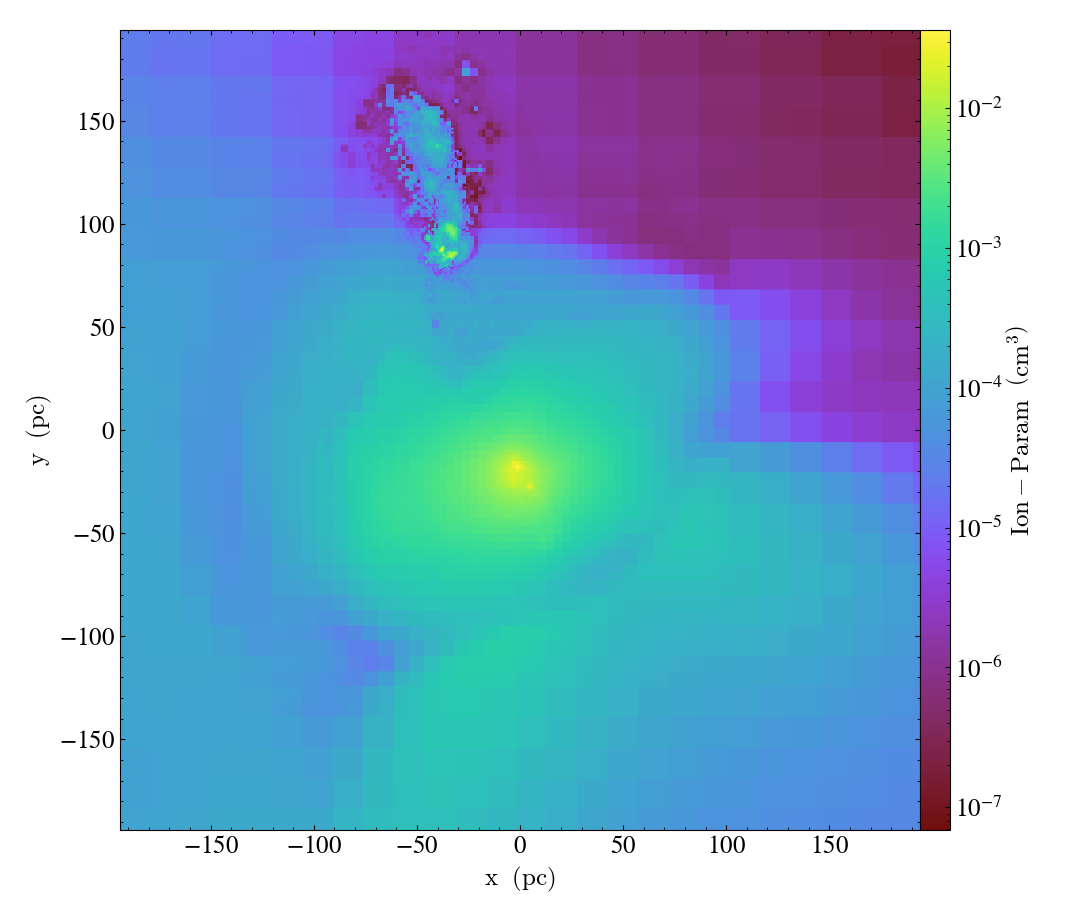

In [ ]:
p = yt.ProjectionPlot(ds, "z", ("gas", "ion-param"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      data_source=sp,
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

#p.save()
p.show()

# Ionization parameter 
Ionization param2 is in correct units relative to number_density, but is number density in the right units $\left(\frac{1}{cm^3}\right)?$


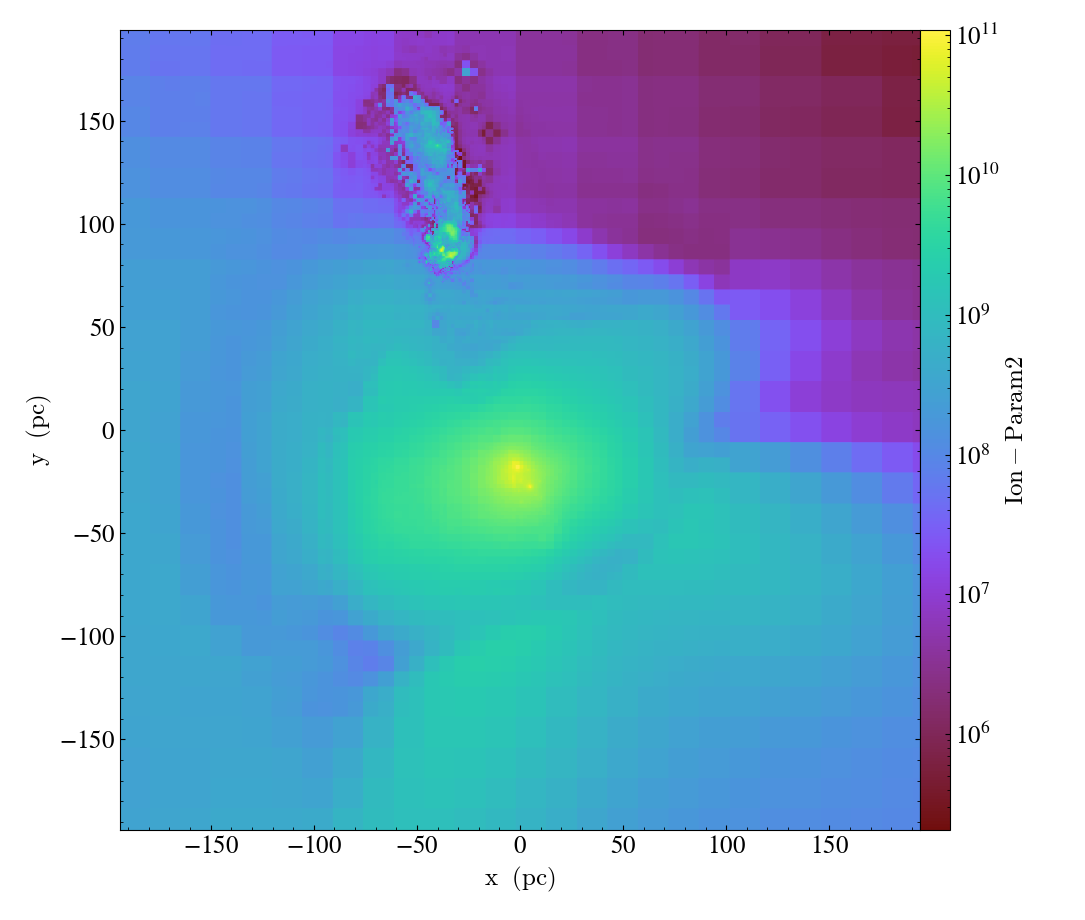

In [ ]:
p = yt.ProjectionPlot(ds, "z", ("gas", "ion-param2"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      data_source=sp,
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

#p.save()
p.show()


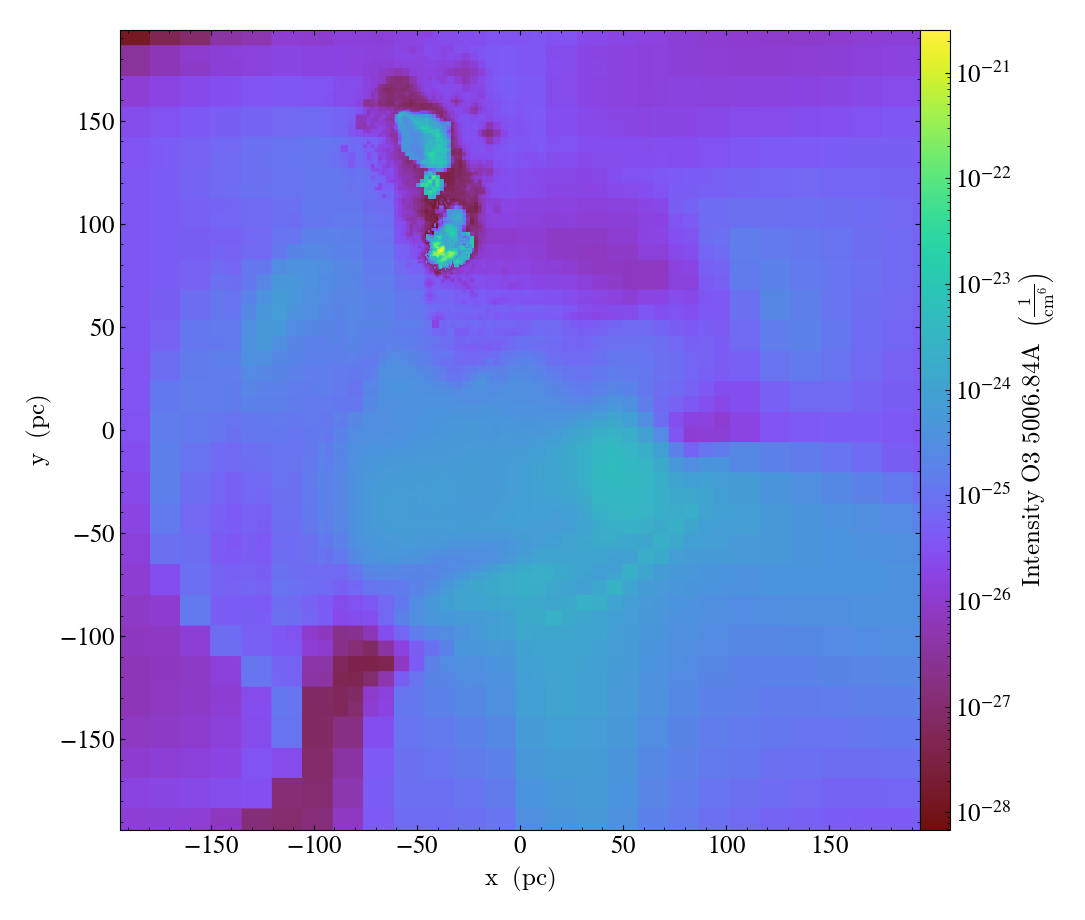

In [ ]:
p = yt.ProjectionPlot(ds, "z", ("gas", "intensity_O3_5006.84A"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      data_source=sp,
                      center=[0.49118094, 0.49275361, 0.49473726])

#p.save()
p.show()


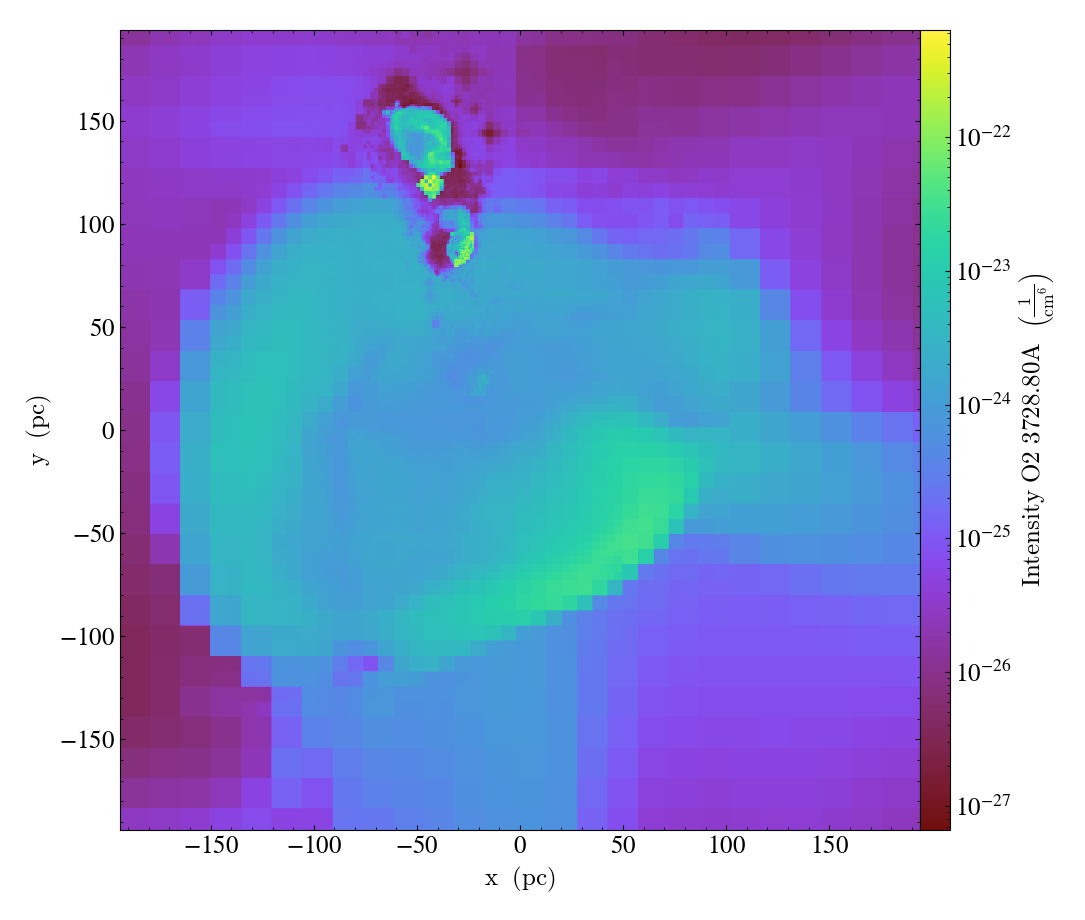


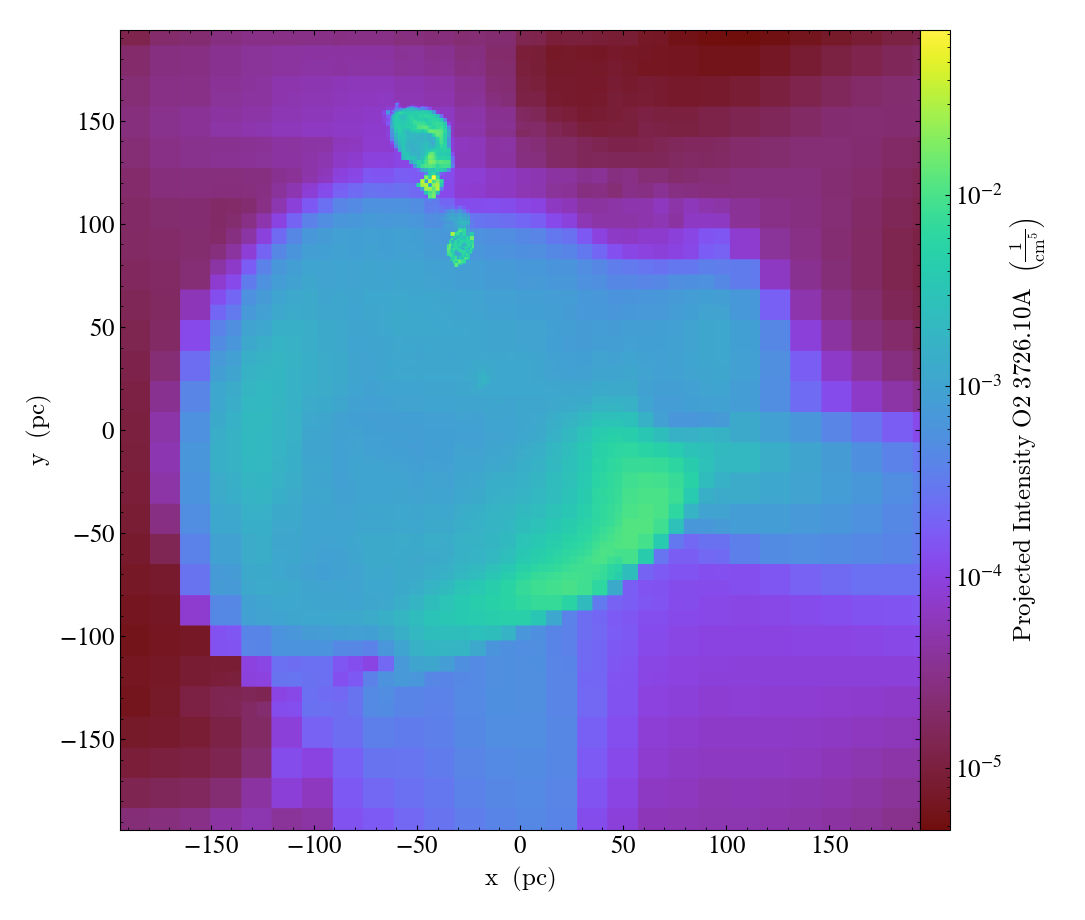

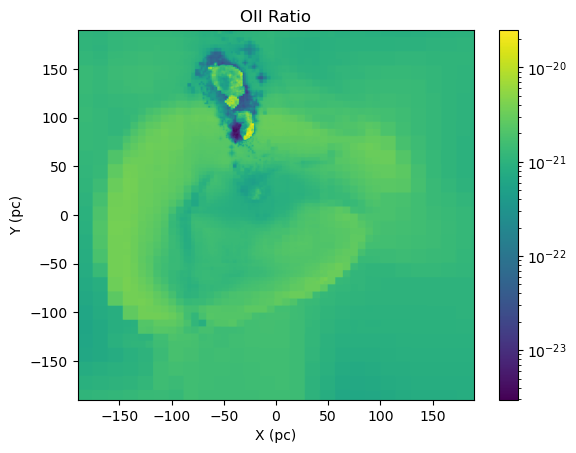

In [ ]:
from matplotlib.colors import LogNorm

# Define the center for the projection
center = [0.49118094, 0.49275361, 0.49473726]

# Create Projection Plots
p1 = yt.ProjectionPlot(ds, "z", ("gas", "intensity_O2_3728.80A"), width=0.0001,
                      weight_field=("gas", "number_density"), #in units of 1/cm
                      buff_size=(1000, 1000),
                      data_source=sp,
                      center=center)

p2 = yt.ProjectionPlot(ds, "z", ("gas", "intensity_O2_3726.10A"), width=0.0001,
                      #weight_field=("gas", "number_density"), 
                      buff_size=(1000, 1000),
                      data_source=sp,
                      center=center)

p1.show()
p2.show()

# Fixed-Resolution Buffer from the projection
p1_frb = p1.frb  #what is a fixed resolution buffer and what is it doing
p2_frb = p2.frb
p1_img = np.array(p1_frb["gas", "intensity_O2_3728.80A"])
p2_img = np.array(p2_frb["gas", "intensity_O2_3726.10A"])
ratio = p1_img/p2_img

#Did we import matplotlib.pyplot today?
# Calculate limits for the plot
lbox = 380  # in pc
extent_dens = [-lbox/2, lbox/2, -lbox/2, lbox/2]
dens_norm = LogNorm(np.min(ratio), np.max(ratio))
# Ensure the aspect ratio of the image matches the scatter plot
plt.imshow(ratio, norm=dens_norm, extent=extent_dens, origin='lower', aspect='auto')
plt.xlabel("X (pc)")
plt.ylabel("Y (pc)")
plt.title("OII Ratio")
plt.xlim(-lbox/2, lbox/2)
plt.ylim(-lbox/2, lbox/2)
plt.colorbar()
plt.show()



### Summing line emissions in spherical region

In [ ]:
lines=["H1_6562.80A","O1_1304.86A","O1_6300.30A","O2_3728.80A","O2_3726.10A","O3_1660.81A",
       "O3_1666.15A","O3_4363.21A","O3_4958.91A","O3_5006.84A", "He2_1640.41A","C2_1335.66A",
       "C3_1906.68A","C3_1908.73A","C4_1549.00A","Mg2_2795.53A","Mg2_2802.71A","Ne3_3868.76A",
       "Ne3_3967.47A","N5_1238.82A","N5_1242.80A","N4_1486.50A","N3_1749.67A","S2_6716.44A","S2_6730.82A"] #
line_sums = []  # Start with an empty Python list
print(ds.field_info["gas", "intensity_H1_6562.80A"].get_source())
for line in enumerate(lines):
    wave_unmod = line[1].split("_")[-1]
    wavelength = wave_unmod[:-1]
    intensitys = sp.quantities.total_quantity(("gas", f"intensity_{line[1]}"))
    line_sums.append((float(intensitys), float(wavelength), f"intensity_{line[1]}"))  # Append the tuple
#sp.quantities. ###find the temperature of the gas
#avg_temp = sp.quantities.weighted_average_quantity(["gas", "Temperature"])
line_sums_array = np.array(line_sums)  # Convert to a NumPy array if needed
print(line_sums_array)
#print(sp.quantities.total_quantity(("gas","intensity_O1_1304.86A")))



    def _line_emission(field, data):
        interpolator=get_interpolator(idx, dens_normalized)

        # Change to log values
        U_val = data['gas', 'ion-param'].value
        N_val = data['gas', 'number_density'].value
        T_val = data['gas', 'temperature'].value

        # Cut off negative temperatures
        T_val = np.where(T_val < 0.0, 10e-4, T_val)

        U = np.log10(U_val)
        N = np.log10(N_val)
        T = np.log10(T_val)

        # Adjust log values to within bounds supported by
        # interpolation table
        Uadj = np.where(U < minU, minU, U)
        Uadj = np.where(Uadj > maxU, maxU, Uadj)

        Nadj = np.where(N < minN, minN, N)
        Nadj = np.where(Nadj > maxN, maxN, Nadj)

        Tadj = np.where(T < minT, minT, T)
        Tadj = np.where(Tadj > maxT, maxT, Tadj)
    
        tup = np.stack((Uadj, Nadj, Tadj), axis=-1)

        size  = Nadj.size
        # Testing with constant U, T -> density variation
        #tup = np.stack(([0.0]*size,

Text(0.5, 1.0, 'Intensity v. Wavelength for different lines')

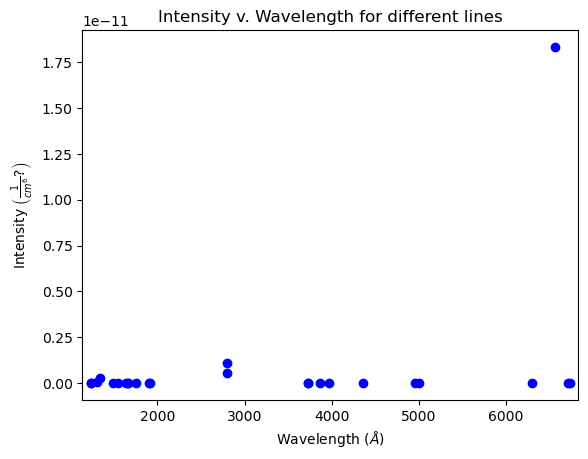

In [ ]:
x_vals = line_sums_array[:,1].astype(float)
y_vals = line_sums_array[:,0].astype(float)
plt.plot(x_vals, y_vals, marker = "o", color = "blue",linestyle = " ")
plt.yscale("linear")
#plt.ylim([min(line_sums[:,0]), max(line_sums[:,0])])
plt.xlim([min(x_vals)-100, max(x_vals)+100])
plt.xlabel(r"Wavelength $(\AA)$")
plt.ylabel(r"Intensity $\left(\frac{1}{cm^6}?\right)$")
plt.title("Intensity v. Wavelength for different lines")

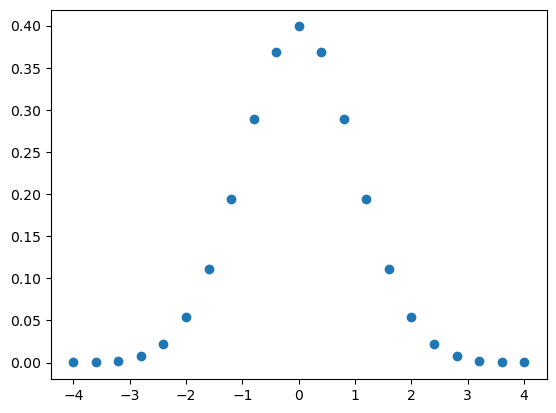

In [ ]:
import scipy
fig, ax = plt.subplots(1)
x = np.linspace(-4,4,21)
mean = 0
sigma = 1
y = scipy.stats.norm.pdf(x, mean, sigma) 
ax.scatter(x,y)
#σ = (√(kT/m)) / c ### this will be the formula I use for determining sigma for each line

### Simple Emission Spectrum

6562.8
1304.86
6300.3
3728.8
3726.1
1660.81
1666.15
4363.21
4958.91
5006.84
1640.41
1335.66
1906.68
1908.73
1549.0
2795.53
2802.71
3868.76
3967.47
1238.82
1242.8
1486.5
1749.67
6716.44
6730.82


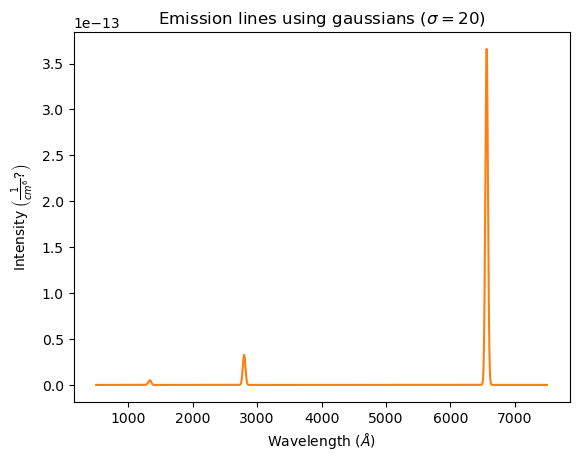

' gaussian_array = []\n#problem with i as an array?\nfor i in enumerate(np.zeros(len(x_vals))):\n    print(i)\n    gaussian_array[i] = gaussian(wavelength, y_vals[i], x_vals[i], sigma)\ngaussian_array = np.array(gaussian_array)\n#gaussian for each emission\n#add gaussian functions\n#apply over linspace of wavelength '

In [ ]:
def gaussian(x, area, mean, std): #this should already exist look these things up!!!!
    return area * (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))
sigma = 20 #arbitrary value for now
wavelength = (min(x_vals)-100, max(x_vals)+100, 3000)
#how do we determine sigma
#how do we set this up so we can add gaussians together
y_tot = np.zeros(70000) #array for storing y values
x = np.linspace(500,7500, 70000) #wavelength range
for i in range(len(x_vals)):
    y = gaussian(x, y_vals[i], x_vals[i], sigma) # applies the gaussian for one peak over x array to obtain y values
    center_val = gaussian(x_vals[i], y_vals[i], x_vals[i], sigma)
    print(x_vals[i])
    #print(center_val/y_vals[i[0]])
    y_tot = y_tot+y 
    #print(int(np.round(x_vals[i[0]])))
    #print(x_vals[i[0]], y_tot[int(np.round(x_vals[i[0]]))-500]) #prints wavelength and gaussian peak at that point
#gaus_vals = gaussian
plt.plot(x,y_tot, marker = " ", color = "tab:orange", linestyle = "-")
plt.yscale("linear")
#plt.ylim(0,10**-31)
#plt.xlim(1050,1150)
plt.xlabel(r"Wavelength $(\AA)$")
plt.ylabel(r"Intensity $\left(\frac{1}{cm^6}?\right)$")
plt.title(r"Emission lines using gaussians ($\sigma = 20$)")
#plt.savefig("Gaussian_emission_plot")
plt.show()



""" gaussian_array = []
#problem with i as an array?
for i in enumerate(np.zeros(len(x_vals))):
    print(i)
    gaussian_array[i] = gaussian(wavelength, y_vals[i], x_vals[i], sigma)
gaussian_array = np.array(gaussian_array)
#gaussian for each emission
#add gaussian functions
#apply over linspace of wavelength """



### Redshift and log scale simple emission spectra

12.171087046255657


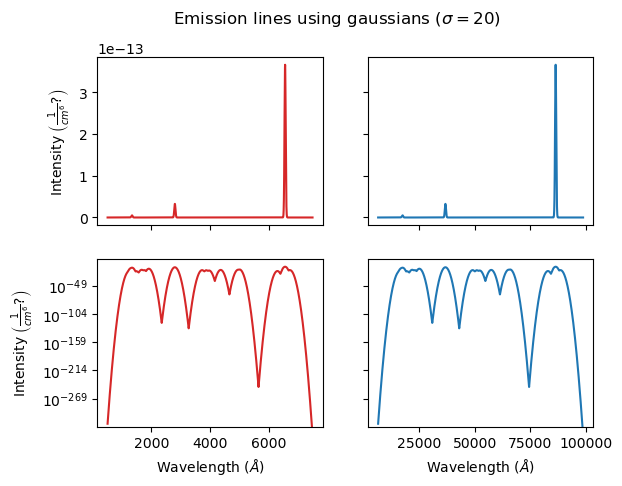

In [ ]:

print(ds.current_redshift)
x_rshift = x * (ds.current_redshift+1)
fig, axs = plt.subplots(2,2)
axs[0,0].plot(x,y_tot, marker = " ", color = "tab:red", linestyle = "-")
axs[1,0].plot(x,y_tot, marker = " ", color = "tab:red", linestyle = "-")
axs[0,1].plot(x_rshift,y_tot, marker = " ", color = "tab:blue", linestyle = "-")
axs[1,1].plot(x_rshift,y_tot, marker = " ", color = "tab:blue", linestyle = "-")
axs[0,0].set_yscale("linear")
axs[1,0].set_yscale("log")
axs[0,1].set_yscale("linear")
axs[1,1].set_yscale("log")
#plt.ylim(0,10**-31)
#plt.xlim(1050,1150)
for ax in axs.flat:
    ax.set(xlabel = r"Wavelength $(\AA)$", ylabel = r"Intensity $\left(\frac{1}{cm^6}?\right)$")
fig.suptitle(r"Emission lines using gaussians ($\sigma = 20$)")
#plt.savefig("Gaussian_emission_plot")
### Don't know how this works
for ax in axs.flat:
    ax.label_outer()
plt.show()
print(axs.flat)




In [ ]:
from yt.units import YTQuantity
print(ds.field_info["gas", "velocity_x"])
cgs_c = YTQuantity(2.998E10, "cm/s")
print(cgs_c.units)
#print(help(yt.units.physical_constants)) #figure out how to look for ytquantities

Alias Field for ('ramses', 'x-velocity') ('gas', 'velocity_x'): (units: 'cm/s')
cm/s


In [ ]:
from yt.units import unyt_array
x_velocities = sp[("gas", "velocity_x")] ### Many different x velocities, which one is most applicable to us?

print(sp[("gas", "intensity_S2_6716.44A")]) #S2_6730.82A

def obs_wavelength (base_wavelength, velocities):
    x_lambda = []
    for velocity in velocities:
         x_lambda.append((velocity / cgs_c + 1) * base_wavelength)
    return x_lambda

baselambdas = unyt_array((line_sums_array[:,1].astype(float)), "angstrom")
print(type(x_velocities))
obs_lambda = obs_wavelength(baselambdas, x_velocities)
print(obs_lambda)

[1.16253112e-41 4.01287676e-44 4.43814165e-42 ... 4.83142820e-44
 4.29908595e-44 5.10193610e-44] cm**(-6)
<class 'unyt.array.unyt_array'>


In [ ]:
'''vars = {}
lines = line_sums_array[:,2]
for line in (line_sums_array[:,2]):
    vars[line] = []

for part in obs_lambda:
    for i in range(len(lines)):
        print(line_sums_array[i,2])'''

'vars = {}\nlines = line_sums_array[:,2]\nfor line in (line_sums_array[:,2]):\n    vars[line] = []\n\nfor part in obs_lambda:\n    for i in range(len(lines)):\n        print(line_sums_array[i,2])'

In [ ]:
'''baselambdas = unyt_array((line_sums_array[:,1].astype(float)), "angstrom")

"""BradenNebularLinesdef _wavesum(field, data): 

    cgs_c =  2.99792458e10     #light velocity
    pd_2 = data['rt','photon_density_2']#*p["unit_pf"]/cgs_c #physical photon number density in cm-3
    pd_3 = data['rt','photon_density_3']#*p["unit_pf"]/cgs_c
    pd_4 = data['rt','photon_density_4']#*p["unit_pf"]/cgs_c

    photon = pd_2 + pd_3 + pd_4

    return """


def _shifter(field, data, baselambda):
    v_x = data['gas', 'velocity_x']
    
    
    return (v_x / cgs_c + 1) * baselambda

for i in range(len(lines)):
    yt.add_field(
        #('gas', 'intensity_' + lines[i] + '_[erg_cm^{-2}_s^{-1}]'),
        ('gas', 'basewave_' + lines[i]),
        function= _shifter(data = sp, baselambda = baselambdas[i]),
        sampling_type='cell',
        units="angstrom"
    )
'''

'baselambdas = unyt_array((line_sums_array[:,1].astype(float)), "angstrom")\n\n"""BradenNebularLinesdef _wavesum(field, data): \n\n    cgs_c =  2.99792458e10     #light velocity\n    pd_2 = data[\'rt\',\'photon_density_2\']#*p["unit_pf"]/cgs_c #physical photon number density in cm-3\n    pd_3 = data[\'rt\',\'photon_density_3\']#*p["unit_pf"]/cgs_c\n    pd_4 = data[\'rt\',\'photon_density_4\']#*p["unit_pf"]/cgs_c\n\n    photon = pd_2 + pd_3 + pd_4\n\n    return """\n\n\ndef _shifter(field, data, baselambda):\n    v_x = data[\'gas\', \'velocity_x\']\n    \n    \n    return (v_x / cgs_c + 1) * baselambda\n\nfor i in range(len(lines)):\n    yt.add_field(\n        #(\'gas\', \'intensity_\' + lines[i] + \'_[erg_cm^{-2}_s^{-1}]\'),\n        (\'gas\', \'basewave_\' + lines[i]),\n        function= _shifter(data = sp, baselambda = baselambdas[i]),\n        sampling_type=\'cell\',\n        units="angstrom"\n    )\n'